In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'hello#$@'
a.translate(s)

'hello'

In [3]:
# to remove stop words
stop_words = stopwords.words('english')
# to remove punctuation
translator = str.maketrans('', '', punctuation)

In [4]:
def clean_text(documents: list, path: str) -> int:
    max_length_text = 0
    for file in os.listdir(path):
        with open (path + file) as f:
            text = f.read()
            # split words
            tokens = word_tokenize(text)
            # remove punctuation
            tokens = [token.translate(translator) for token in tokens]
            # remove stop words
            tokens = [token for token in tokens if token not in stop_words]
            if len(tokens) > max_length_text:
                max_length_text = len(tokens)
            # concatenate all clean words
            tokens = ' '.join(tokens)
            documents.append(tokens)
    return max_length_text

In [5]:
# for negative texts
negative_max_length_text = 0
negative_documents = []
negative_direction = 'data/neg/'
negative_max_length_text = clean_text(negative_documents, negative_direction)
print(negative_max_length_text)

1400


In [6]:
# for positive texts
positive_max_length_text = 0
positive_documents = []
positive_direction = 'data/pos/'
positive_max_length_text = clean_text(positive_documents, positive_direction)
print(positive_max_length_text)

1693


In [7]:
max_length_text = max(negative_max_length_text, positive_max_length_text)

In [8]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [9]:
# create train data
X_train = negative_documents[:800] + positive_documents[:800]
len(X_train)

1600

In [10]:
# create labels for train data
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]
len(y_train)

1600

In [11]:
# create test data
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [12]:
# create labels for test data
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]
len(y_test)

400

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
vocabulary_size = len(tokenizer.word_index) + 1

In [16]:
# make data numerical
encoded = tokenizer.texts_to_sequences(X_train)
encoded[0]

[20,
 822,
 12942,
 1710,
 7,
 32,
 3,
 7,
 588,
 572,
 4083,
 607,
 1898,
 755,
 65,
 154,
 5825,
 11,
 438,
 6918,
 15086,
 868,
 12943,
 5,
 37,
 74,
 272,
 5826,
 144,
 5509,
 74,
 102,
 2719,
 2720,
 9275,
 18299,
 79,
 2945,
 545,
 198,
 4405,
 65,
 57,
 111,
 1,
 18300,
 62,
 670,
 360,
 787,
 3803,
 344,
 52,
 12,
 1833,
 422,
 3216,
 1298,
 2946,
 9276,
 2251,
 433,
 340,
 23984,
 2783,
 1278,
 623,
 4084,
 795,
 4083,
 1,
 41,
 21,
 7887,
 46,
 141,
 2,
 6165,
 142,
 6516,
 276,
 108,
 22,
 2,
 2465,
 11,
 75,
 160,
 4083,
 23985,
 407,
 119,
 5509,
 6919,
 1196,
 8518,
 5247,
 4406,
 439,
 45,
 5,
 198,
 23986,
 75,
 18,
 2524,
 974,
 277,
 160,
 283,
 5,
 4083,
 166,
 1666,
 65,
 81,
 1688,
 5827,
 761,
 659,
 1531,
 4779,
 455,
 989,
 5510,
 1932,
 4083,
 829,
 32,
 27,
 19,
 3,
 32,
 1710,
 4083,
 39,
 8519,
 4590,
 15087,
 188,
 16,
 4780,
 6,
 2651,
 2721,
 3668,
 1067,
 43,
 7404,
 109,
 7888,
 10222,
 1457,
 288,
 1407,
 28,
 11403,
 2361,
 6517,
 5511,
 226,
 7889,
 

In [17]:
padded = pad_sequences(encoded, maxlen=max_length_text, padding='post')
padded[0]

array([   20,   822, 12942, ...,     0,     0,     0])

In [18]:
 padded.shape

(1600, 1693)

In [21]:

input1 = Input(shape=(max_length_text,))
embedding1 = Embedding(vocabulary_size, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
dropout1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(dropout1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [28]:
model = Model(inputs=[input1], outputs=output)

In [29]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1693)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1693, 100)         4072300   
                                                                 
 conv1d_1 (Conv1D)           (None, 1690, 32)          12832     
                                                                 
 dropout (Dropout)           (None, 1690, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 845, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 27040)             0         
                                                           

In [31]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_length_text, padding='post')


In [32]:
import numpy as np

In [33]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
model.fit(padded, y_train, epochs=10, batch_size=20, validation_data=(padded_test, y_test))

Epoch 1/10
80/80 [==============================] - 19s 225ms/step - loss: 0.6890 - accuracy: 0.5412 - val_loss: 0.6849 - val_accuracy: 0.5225
Epoch 2/10
80/80 [==============================] - 18s 228ms/step - loss: 0.4782 - accuracy: 0.8394 - val_loss: 0.5319 - val_accuracy: 0.7275
Epoch 3/10
80/80 [==============================] - 18s 231ms/step - loss: 0.0629 - accuracy: 0.9962 - val_loss: 0.4085 - val_accuracy: 0.7950
Epoch 4/10
80/80 [==============================] - 20s 248ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4103 - val_accuracy: 0.8075
Epoch 5/10
80/80 [==============================] - 20s 255ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0.8225
Epoch 6/10
80/80 [==============================] - 20s 254ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4052 - val_accuracy: 0.8000
Epoch 7/10
80/80 [==============================] - 21s 261ms/step - loss: 6.8451e-04 - accuracy: 1.0000 - val_loss: 0.4043 - val_accuracy: 0.

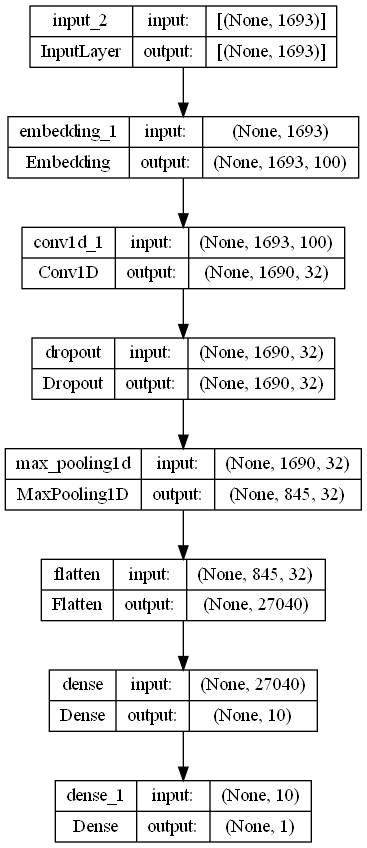

In [35]:
plot_model(model, show_shapes=True)